Importing the libraries and dataset. Also taking a look at the dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

slidings = pd.read_csv('Data\slidings_training.csv')
slidings = slidings.drop(columns='Unnamed: 0',axis=1)
slidings.head()

,situation,location,risk,victims,deadly_victims,length,num_points,in_place,sliding,Rain
0,1,1,0,0,0,0,0,0,1,0.60
1,1,1,0,0,0,0,0,0,1,0.60
2,1,1,0,0,0,0,0,0,1,0.13
3,1,1,0,0,0,0,0,0,1,2.17
4,1,1,0,0,0,0,0,0,1,93.60


In [2]:
slidings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45931 entries, 0 to 45930
Data columns (total 10 columns):
situation         45931 non-null int64
location          45931 non-null int64
risk              45931 non-null int64
victims           45931 non-null int64
deadly_victims    45931 non-null int64
length            45931 non-null int64
num_points        45931 non-null int64
in_place          45931 non-null int64
sliding           45931 non-null int64
Rain              45931 non-null float64
dtypes: float64(1), int64(9)
memory usage: 3.5 MB


In this notebook we will be evaluating the Support Vector Machine(SVM) algorithm. Random state will be set to 2. Since SVM is a heavy model for large multi feature dataframes, the goal here is just to compare the scores to other models.

In [3]:
random_state = 2
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = slidings.drop(columns={'sliding'},axis=1)
y= slidings['sliding']

model = SVC()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=random_state)
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

Setting the kernel to linear so we can run the coeficients method later on.

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      6068
           1       1.00      0.61      0.76      3119

    accuracy                           0.87      9187
   macro avg       0.92      0.81      0.83      9187
weighted avg       0.89      0.87      0.86      9187



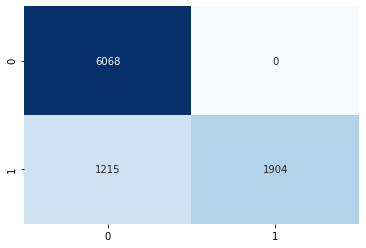

In [4]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score, accuracy_score

kernel='linear'
model = SVC(kernel=kernel ,random_state=random_state)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))
cfm = confusion_matrix(y_test,predictions)
sns.heatmap(cfm, cbar=False, annot=True, cmap='Blues', fmt='d')

In [5]:
model.score(X,y)

0.8737236289216433

Validating with cross validation.

In [6]:
from sklearn.model_selection import cross_val_score
X1 = StandardScaler().fit_transform(X)
scores = cross_val_score(model, X1, y, cv=4)
scores

array([0.9002003 , 0.83384133, 0.88173822, 0.87841839])

In [7]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.87 (+/- 0.05)


In [8]:
scores_precision = cross_val_score(model, X1, y, cv=4, scoring='precision')
scores_precision

array([0.99587397, 1.        , 1.        , 0.99958246])

In [9]:
print("Precision: %0.2f (+/- %0.2f)" % (scores_precision.mean(), scores_precision.std() * 2))

Precision: 1.00 (+/- 0.00)


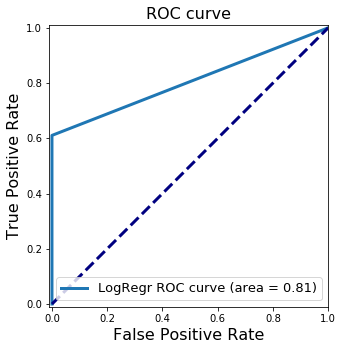

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(5,10))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.gca().set_aspect('equal')
plt.show()

In [11]:
importances = model.coef_
for i in range(0,9):
    print( X.columns[i],"%.4f" % importances[0,i])

situation 0.8043
location 0.0000
risk -0.0001
victims -0.0000
deadly_victims 0.0256
length 0.0000
num_points -0.0000
in_place 0.0001
Rain 0.0000


The results are very similar to the random forest classifier model but the processing time is much higher, so we will discontinue further analysis with this model.